# Visualizing relationships and distributions

In [42]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine_data = pd.read_csv('data/winequality-white.csv', 
                        names=["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar",
                                "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density", 
                                "pH", "Sulphates", "Alcohol", "Quality"],
                        skiprows=1,
                        sep=r'\s*;\s*', engine='python')
wine_data.head()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  Chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   Free Sulfur Dioxide  Total Sulfur Dioxide  Density    pH  Sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   Alcohol  Quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [5]:
print(len(wine_data.index))

4898


In [6]:
wine_data.describe()

Fixed Acidity  Volatile Acidity  Citric Acid  Residual Sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         Chlorides  Free Sulfur Dioxide  Total Sulfur Dioxide      Density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    Sulphates      Alcohol      Quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

## Find patterns in dataset

Let's say you are having a get together with your friends, and you are responsible for bringing in the wine. You turn to a vendor and he suggest a set of wine variety which varies in taste and flavour. You now want to see if this mix of wines is fit for your party.  How do you do it?

Trying out samples of all categories would be too much for you. So, you decide to ask the bartender for an analysis of the wines, so you can maybe taste the extremes cases to see if they would work. 

The bartender has given you a sheet with details. How do you now figure out what the extremes are? 
You need to do some analyses, but too many numbers will only confuse you. You realise it is easier to see stuff happening, to visualise your samples. You decided to take the help of seaborn.

Let's begin with figuring out how much alcohol is present across the wine samples. We have to look at how the content of alcohol varies across samples.

### For distributions which vary randomnly with respect to one variable - Univariate Distribution

Plot univariate distribution of elements of a single column using distplot function. <br>
It draws a histogram and fits a kernel density estimate

*The kernel density estimate is a non-parametric way to estimate the probability density function of a random variable. To draw this curve, each observation is replaced with a Gaussian curve centred at that value. Then all such curves are summed, the value of density at each point is computed and the resulting curve is normalized.*

*A histogram is a diagram consisting of rectangles whose area is proportional to the frequency of a variable and whose width is equal to the class interval.*

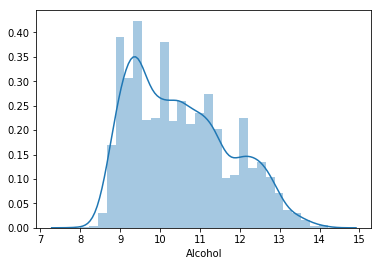

In [7]:
sns.distplot(wine_data['Alcohol'])

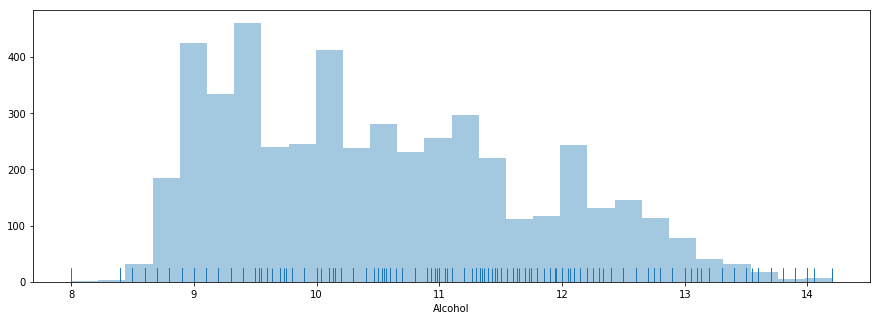

In [10]:
f,ax=plt.subplots(figsize=(15,5))
sns.distplot(wine_data['Alcohol'], kde=False, rug=True);

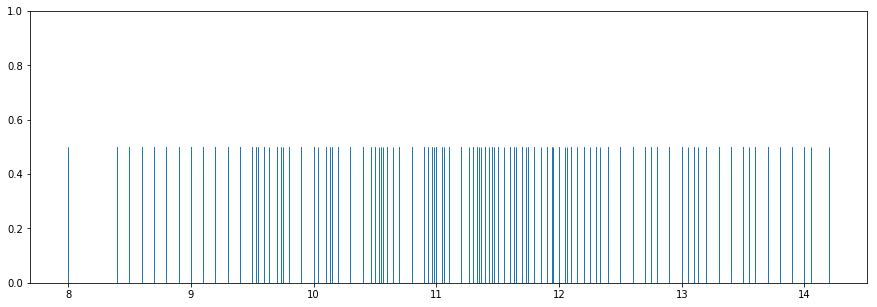

In [11]:
f,ax=plt.subplots(figsize=(15,5))
sns.rugplot(wine_data['Alcohol'], height=0.5, axis='x')

What if we want to minutely observe the number of wine samples with a certain alcohol content? How do we do this?
Vary the number of bins in the histogram. The more you increase the number, the smaller is the width of each bin, and the more you know about individual data points. If not specified, Seaborn chooses the number of bins based on the Freedman-Diaconis rule.

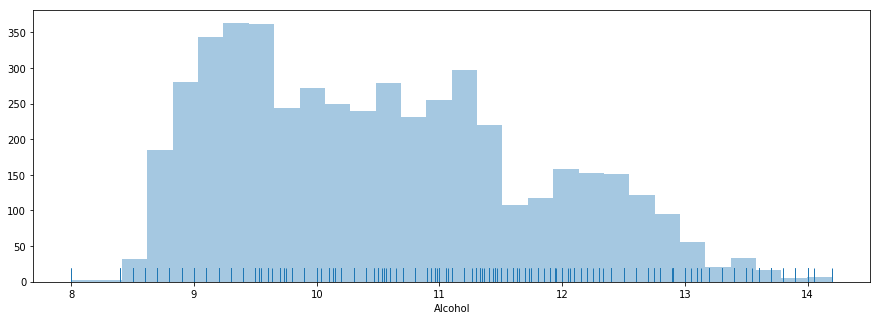

In [12]:
f,ax=plt.subplots(figsize=(15,5))
sns.distplot(wine_data['Alcohol'], bins=30, kde=False, rug=True);

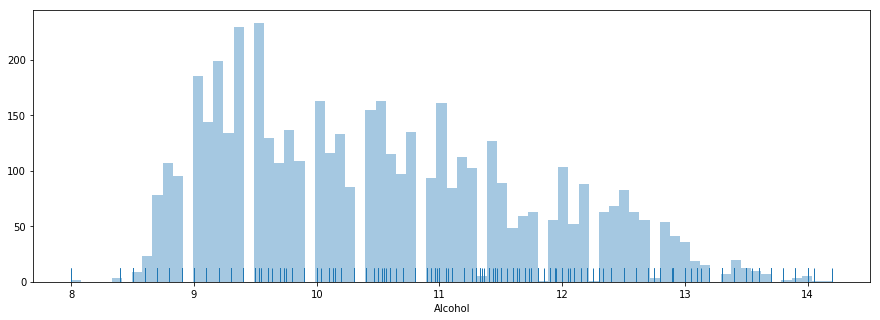

In [13]:
f,ax=plt.subplots(figsize=(15,5))
sns.distplot(wine_data['Alcohol'], bins=75, kde=False, rug=True);

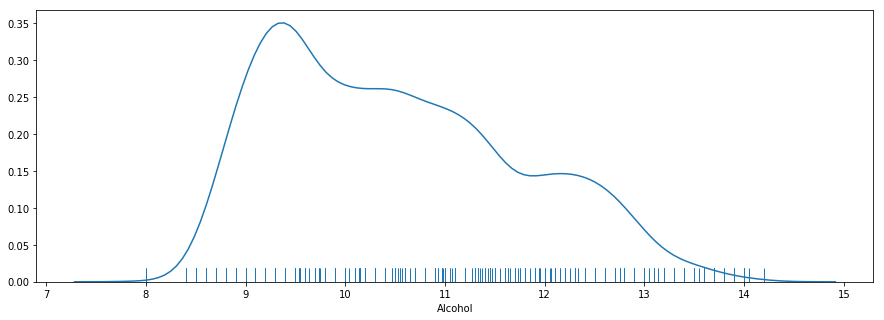

In [14]:
f,ax=plt.subplots(figsize=(15,5))
sns.distplot(wine_data['Alcohol'], hist=False, rug=True);

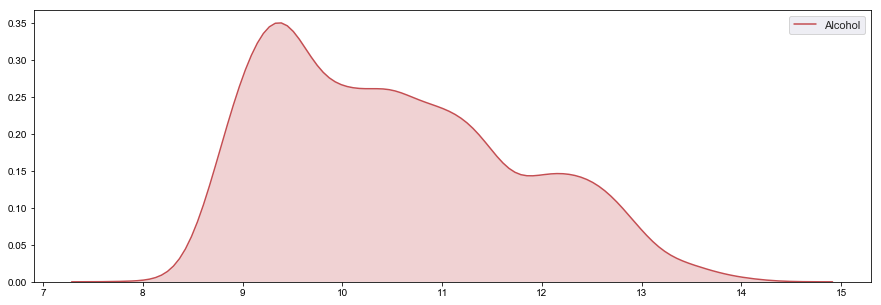

In [15]:
f,ax=plt.subplots(figsize=(15,5))
sns.set(color_codes=True)
sns.kdeplot(wine_data['Alcohol'],shade=True, color="r")

We know that the curve drawn from the points in a graph depends on 
* the accuracy of the points in the plot
* the number of data points chosen

Let us verify the same by plotting curves with different bandwidths controls

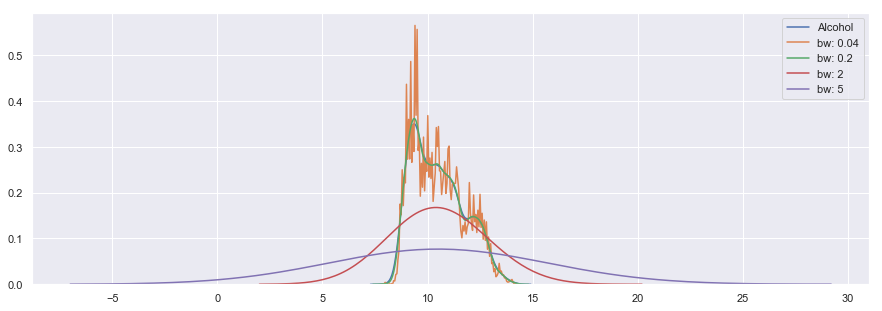

In [16]:
f,ax=plt.subplots(figsize=(15,5))
sns.kdeplot(wine_data['Alcohol'])
sns.kdeplot(wine_data['Alcohol'], bw=.04, label="bw: 0.04")
sns.kdeplot(wine_data['Alcohol'], bw=.2, label="bw: 0.2")
sns.kdeplot(wine_data['Alcohol'], bw=2, label="bw: 2")
sns.kdeplot(wine_data['Alcohol'], bw=5, label="bw: 5")

We can make a few observations from the obtained plot.
* Smaller the bandwidth parameter, more accurate is the curve. But too small a bandwidth unnecessarily crowds the    datapoints
* When explicitly not specified, the tool automatically choses the bandwidth it thinks best describes the distribution, which, more often than not, turns out pretty close.
* While estimating to draw the curve, the path traces points that are beyond the range of the dataset.
* The bw parameter controls how tightly the estimation is fit to the data.

### For distributions which vary randomly in two variables : BIVARIATE DISTRIBUTIONS

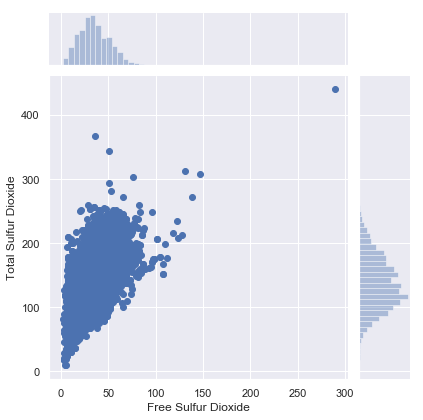

In [18]:
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data)

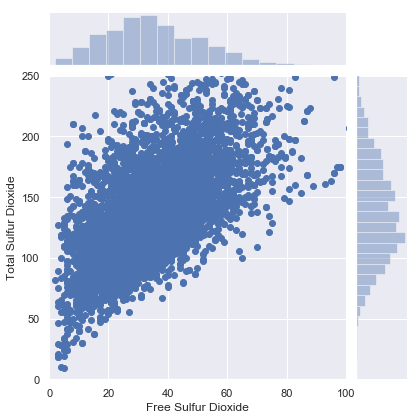

In [19]:
#Adding a x and y limit to the plot to see the scatter plot better
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data,
              xlim={0,100}, ylim={0,250})

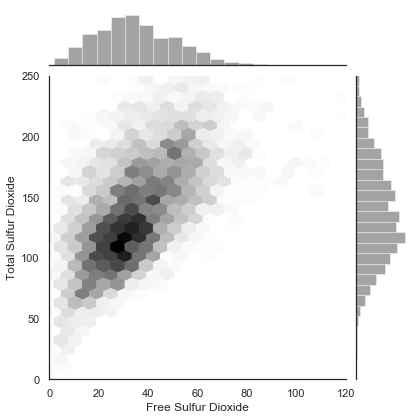

In [20]:
#Adding a hex type to the plot
with sns.axes_style('white'):
    sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
                  kind='hex',color='k',
                  xlim={0,120}, ylim={0,250})

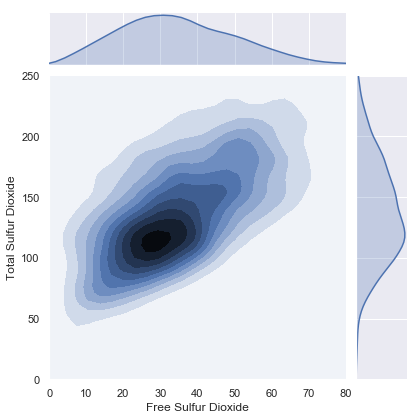

In [21]:
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
              kind="kde",
              xlim={0,80}, ylim={0,250})

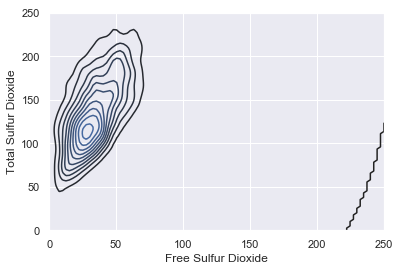

In [22]:
# The clip parameters clips the plot to the specified limits
sns.kdeplot(wine_data['Free Sulfur Dioxide'], wine_data['Total Sulfur Dioxide'], clip=(0,250))

(0, 250)

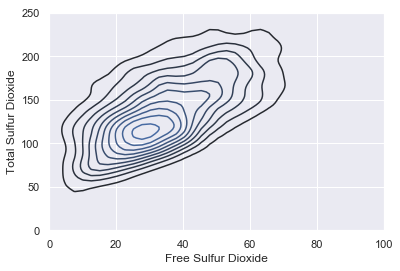

In [23]:
sns.kdeplot(wine_data['Free Sulfur Dioxide'], wine_data['Total Sulfur Dioxide'], clip=(0,250))

#Setting limits to the x and y axes
plt.xlim(0,100)
plt.ylim(0,250)

(-50, 400)

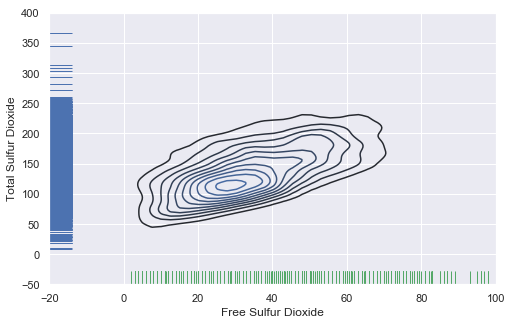

In [24]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(8,5))

sns.kdeplot(wine_data['Free Sulfur Dioxide'],wine_data['Total Sulfur Dioxide'], clip=(0,250))


#adding rug plots to the above
#The vertical tag is used to plot the rug lines along x axis for Total Sulfur Dioxide
sns.rugplot(wine_data['Free Sulfur Dioxide'], color="g", height=0.05)
sns.rugplot(wine_data['Total Sulfur Dioxide'], vertical=True, height=0.05);

#Setting limits to the x and y axes
plt.xlim(-20,100)
plt.ylim(-50,400)

(0, 250)

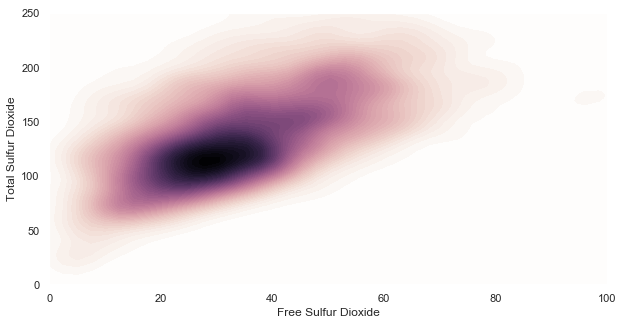

In [25]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(10,5))

cmap = sns.cubehelix_palette(as_cmap=True, dark=1, light=0, reverse=True)
sns.kdeplot(wine_data['Free Sulfur Dioxide'],wine_data['Total Sulfur Dioxide'],clip=(0,250), 
            cmap=cmap, n_levels=60, shade=True);
#The number of contour levels have been increased, and the cubehelix colour palette is used

plt.xlim(0,100)
plt.ylim(0,250)

### PLOTTING PAIRWISE RELATIONSHIPS

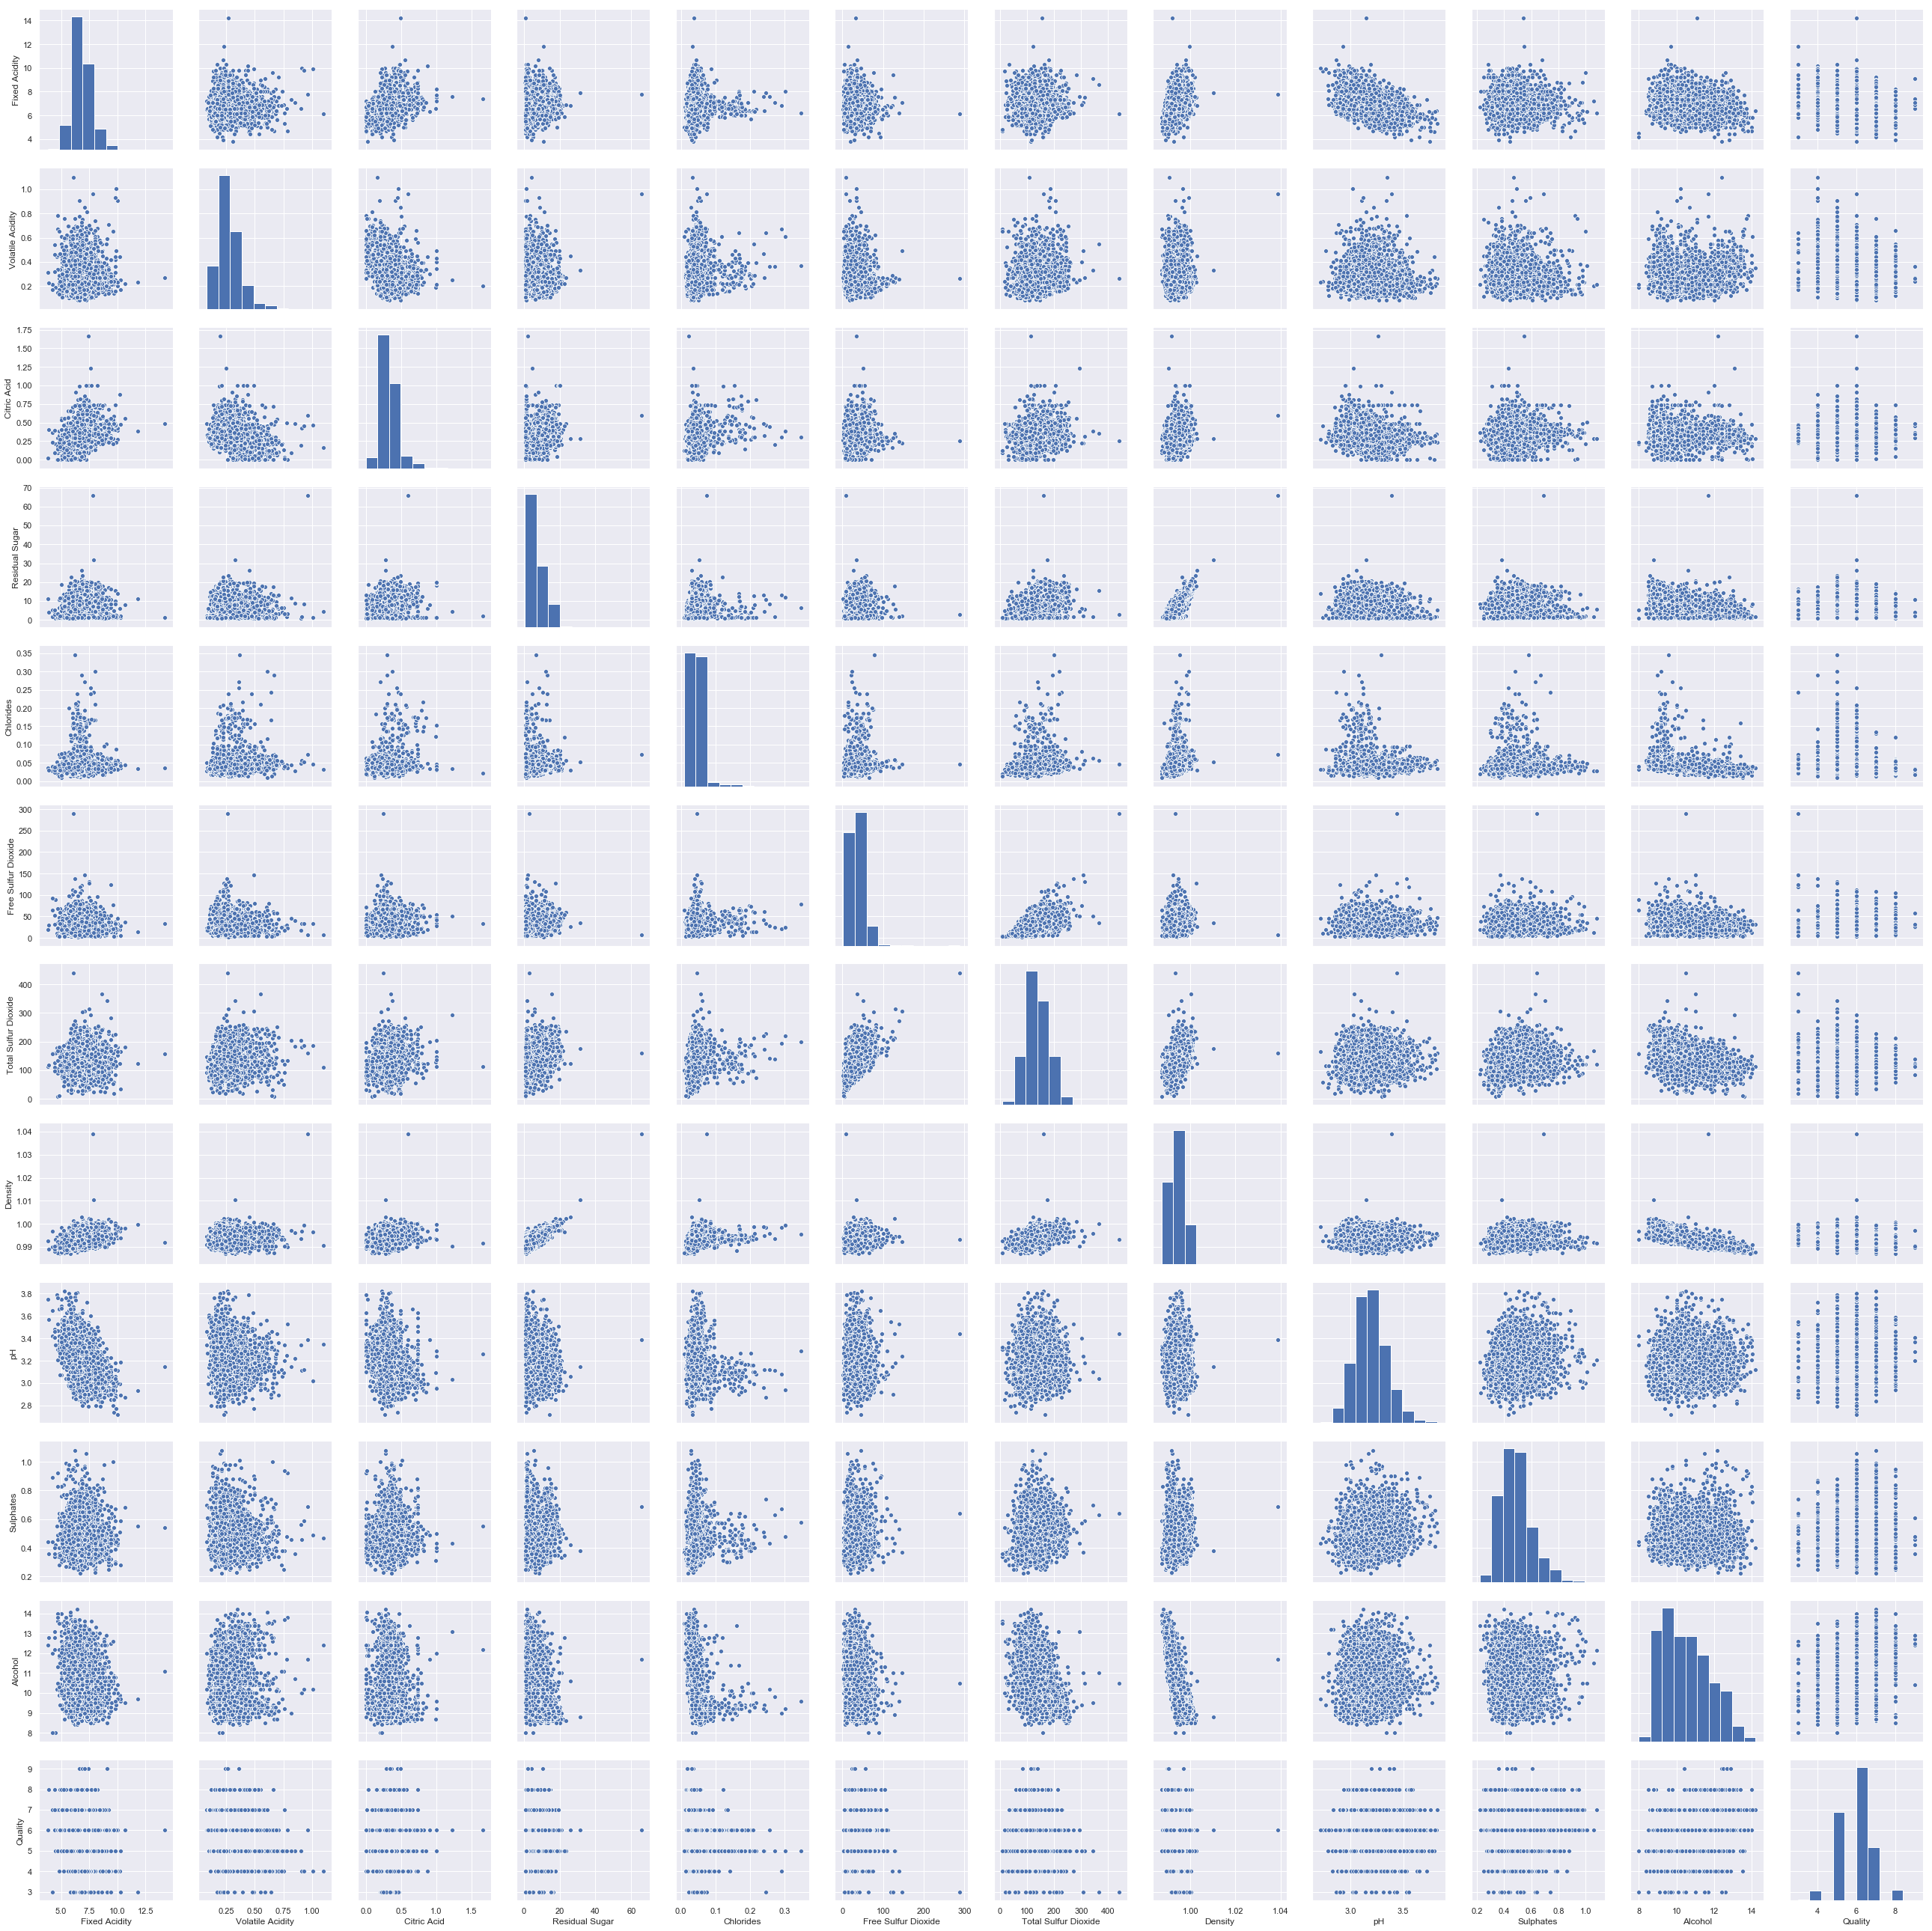

In [27]:
sns.pairplot(wine_data, height=3)

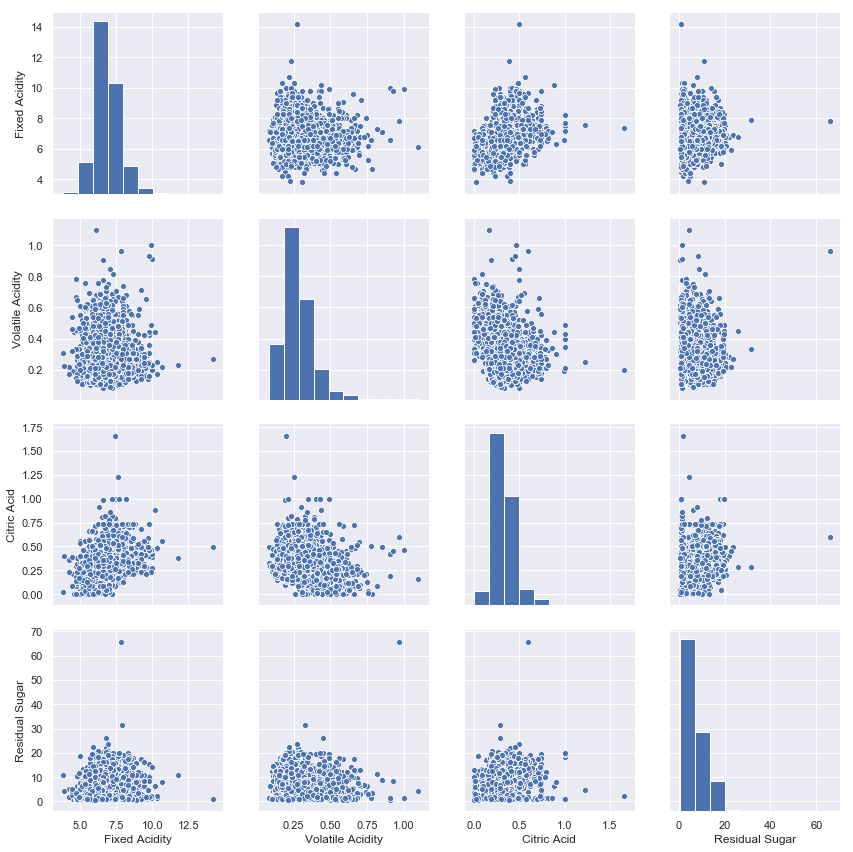

In [28]:
sns.pairplot(wine_data, size=3, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"])

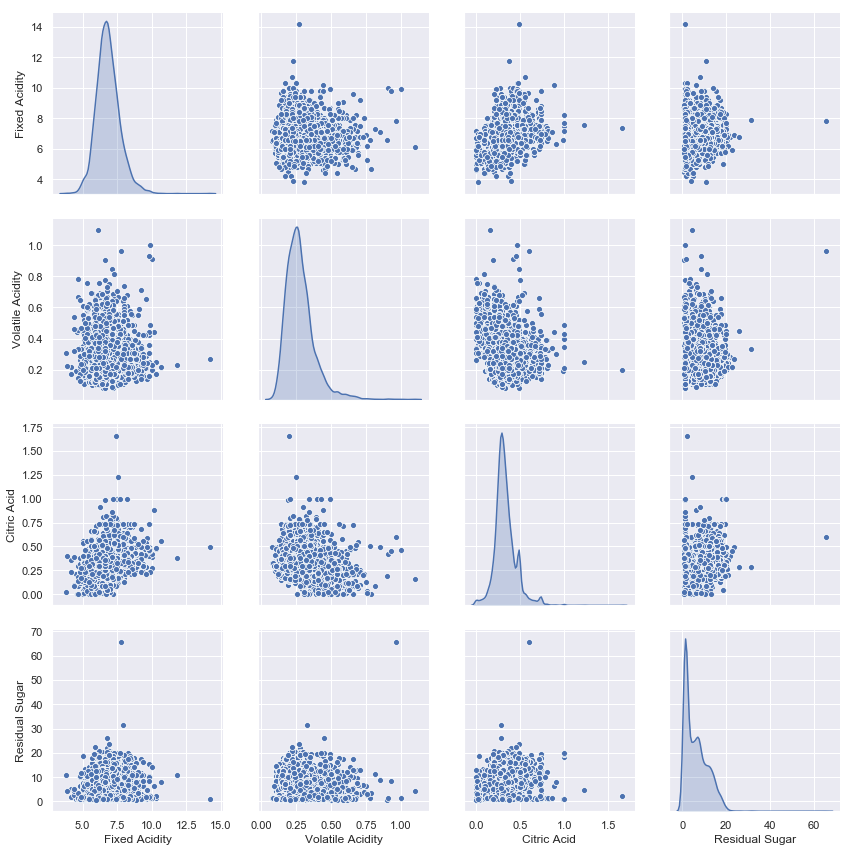

In [29]:
sns.pairplot(wine_data, size=3, 
             vars=["Fixed Acidity","Volatile Acidity","Citric Acid","Residual Sugar"],
             diag_kind="kde")

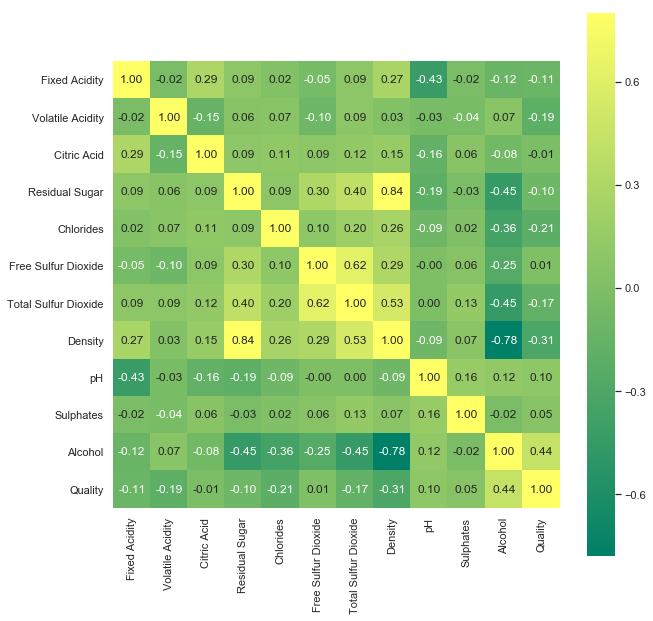

In [31]:
corrmat = wine_data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()

## Visualizing linear relationship

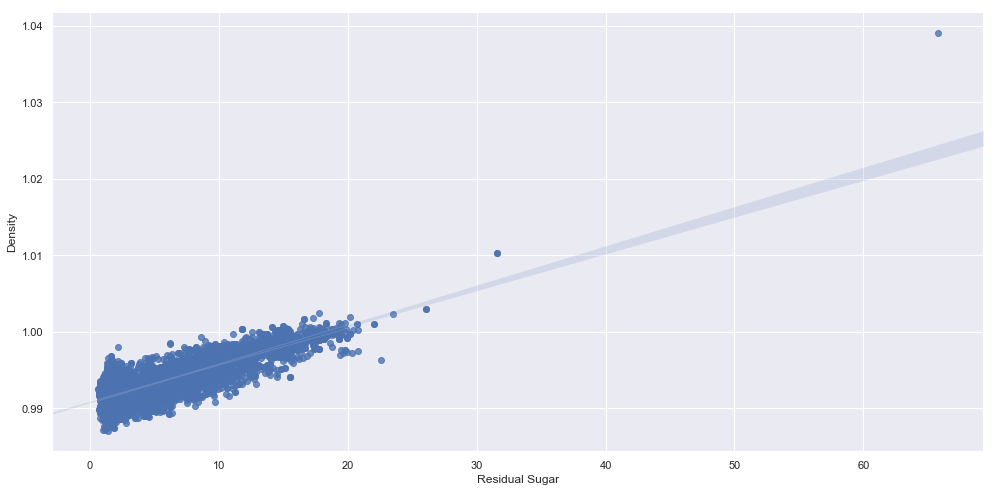

In [33]:
sns.lmplot(x='Residual Sugar', y='Density', data=wine_data, height=7, aspect=2)

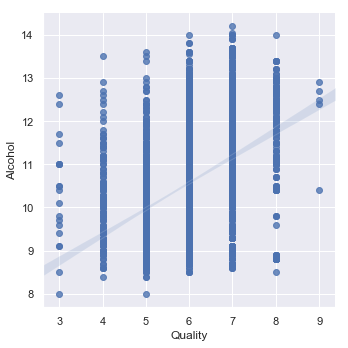

In [34]:
sns.lmplot(x='Quality', y='Alcohol', data=wine_data)

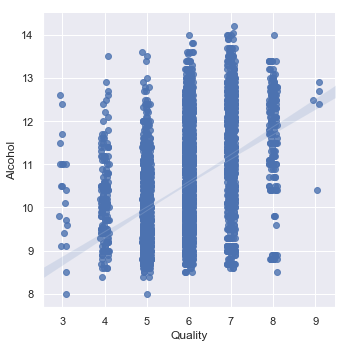

In [35]:
#Adding jitter to the scatter plots
sns.lmplot(x='Quality', y='Alcohol', data=wine_data, x_jitter=.1)

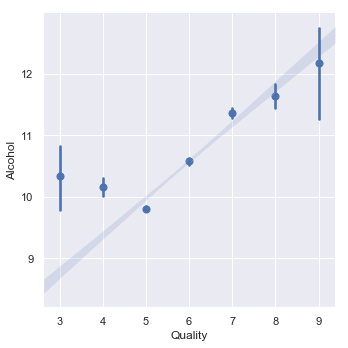

In [36]:
#importing numpy
import numpy as np

#Collapsing the data points in each bin and plotting the central tendency
sns.lmplot(x='Quality', y='Alcohol', data=wine_data, x_estimator=np.mean)

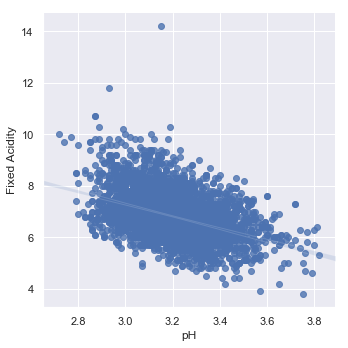

In [37]:
# We plot the relationship between Fixed Acidity content in the wine sample to its pH value
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data)

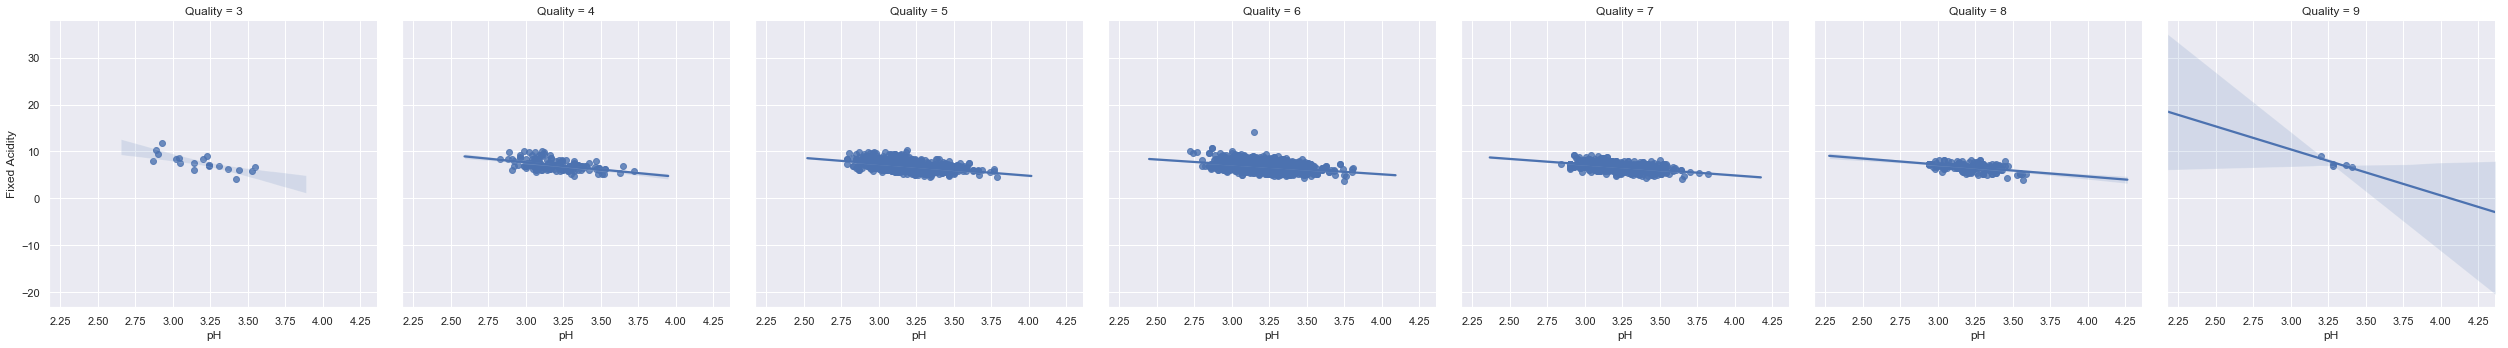

In [38]:
# We thus have as many columns as the number of different quality values.
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, col="Quality")

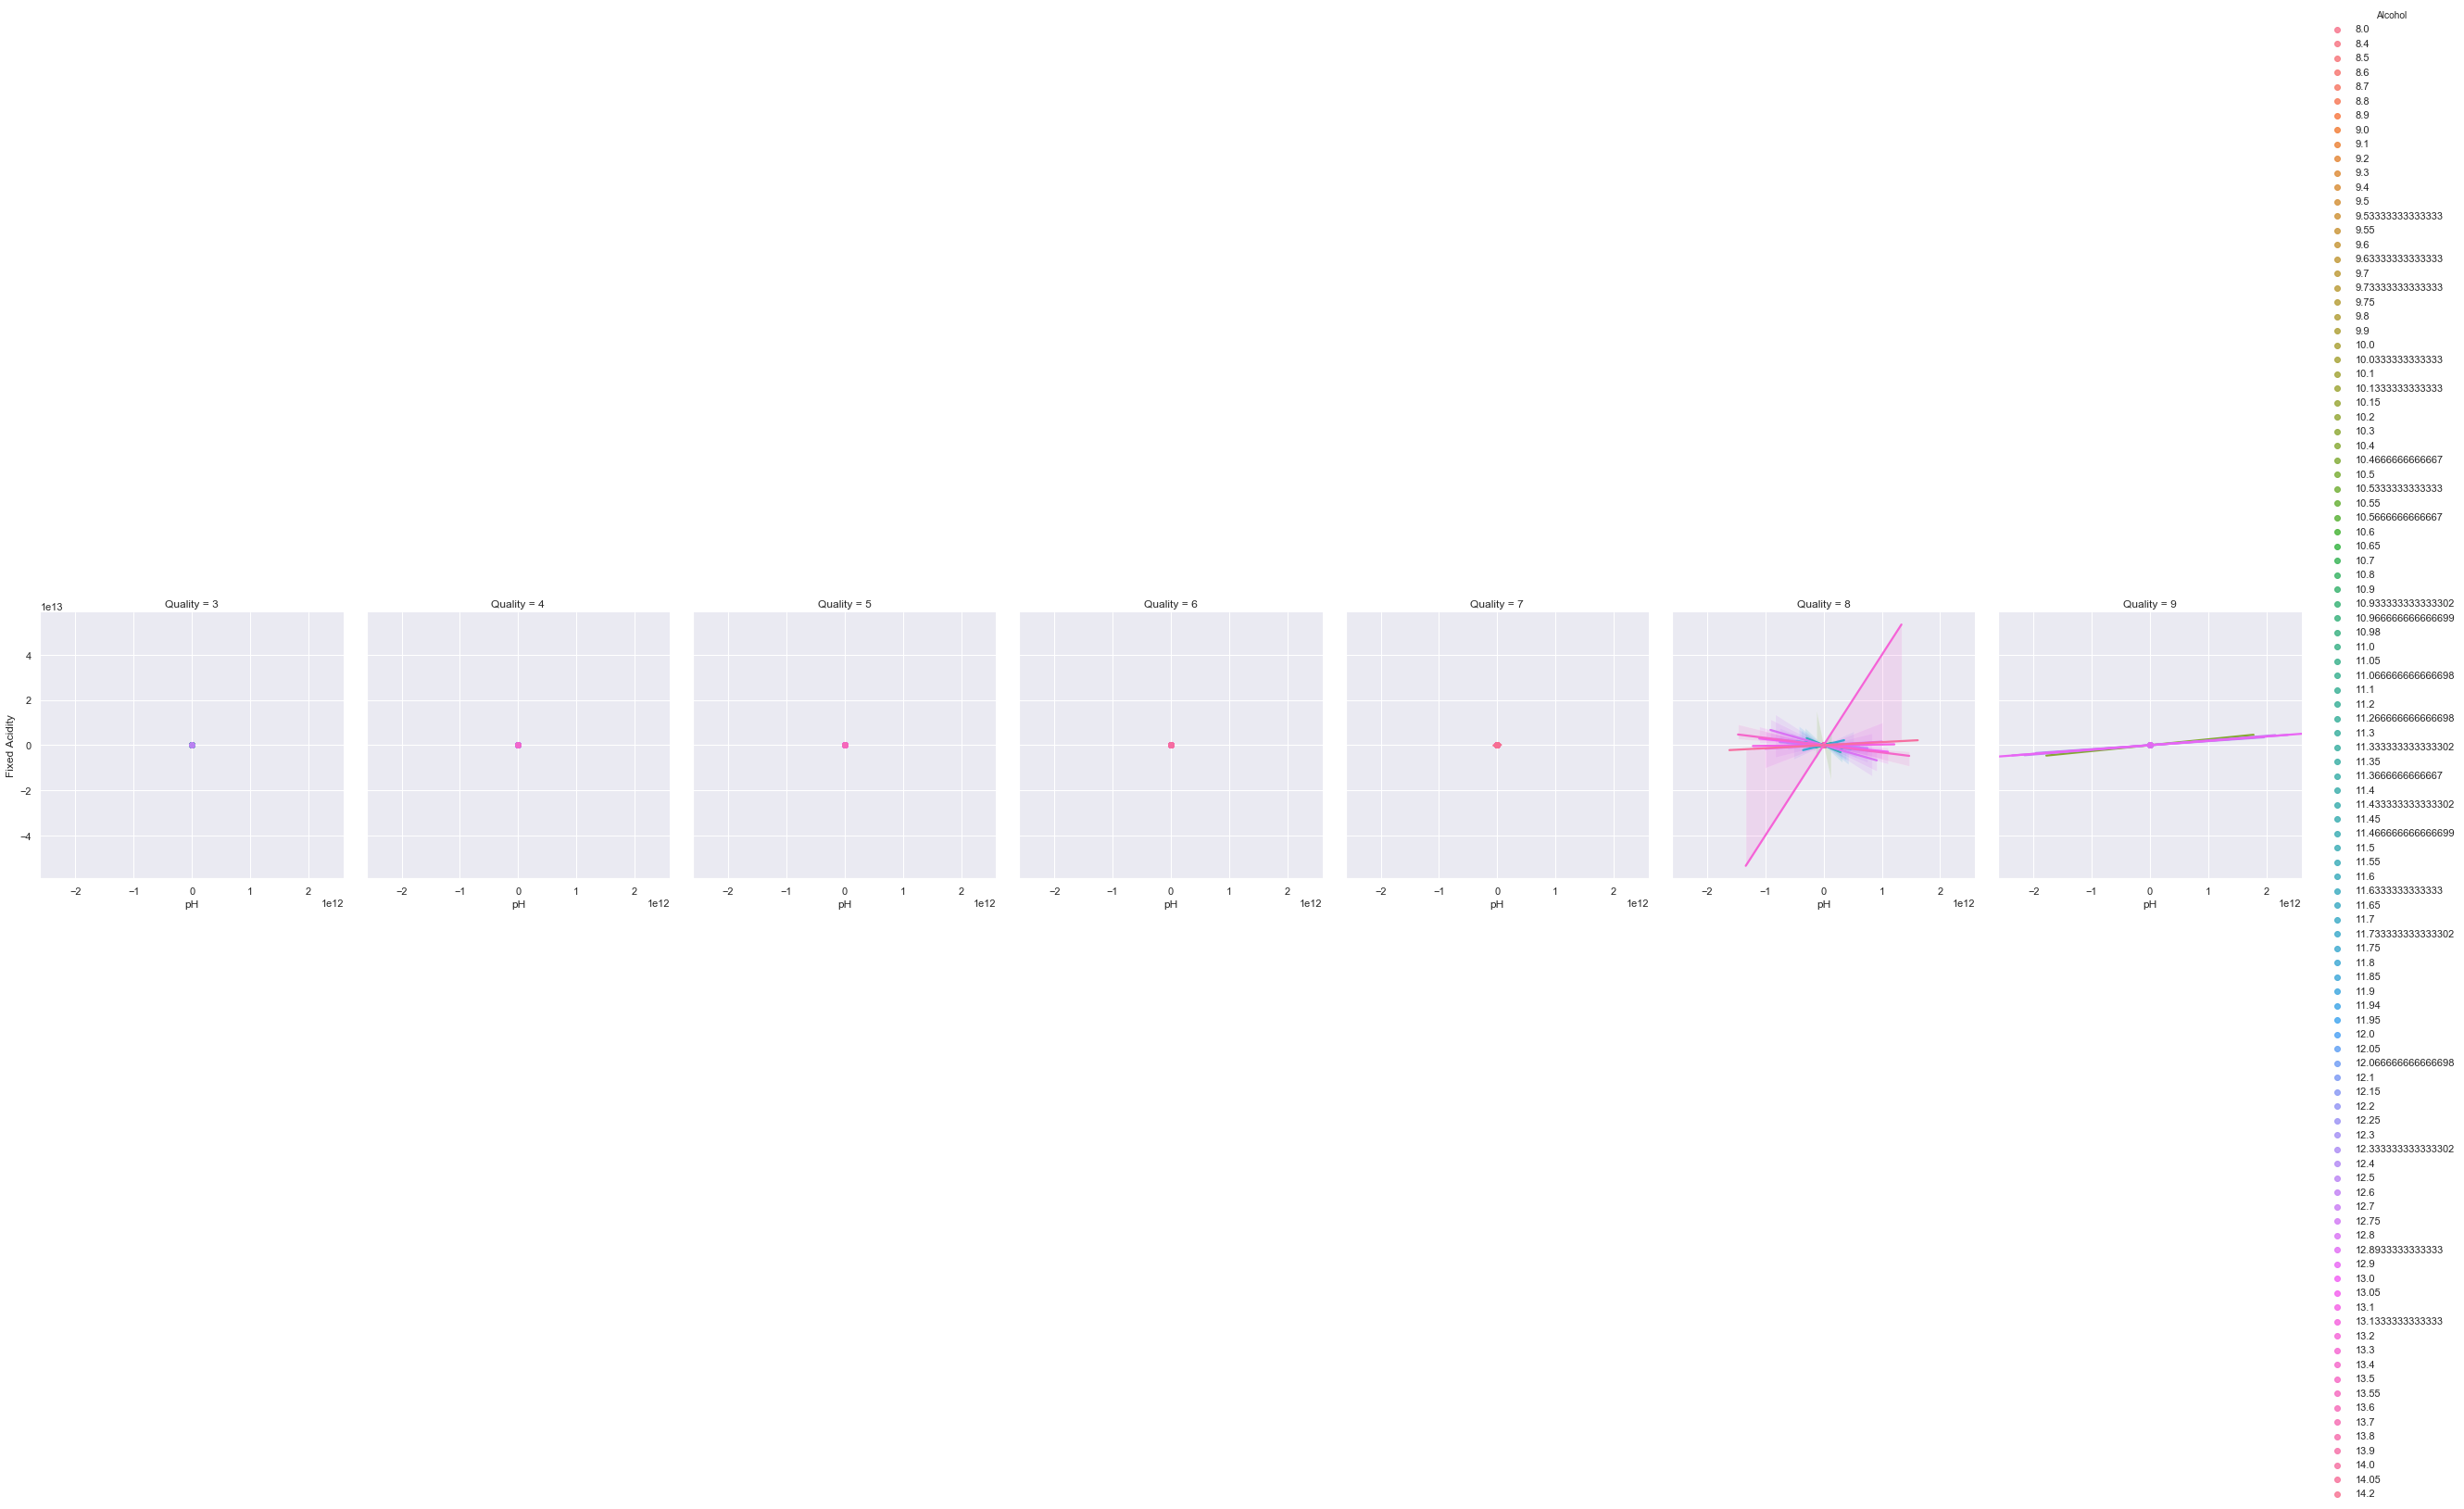

In [39]:
#Thus we get a set of shaded plots. 
sns.lmplot(x='pH', y='Fixed Acidity', data=wine_data, col="Quality", hue="Alcohol")

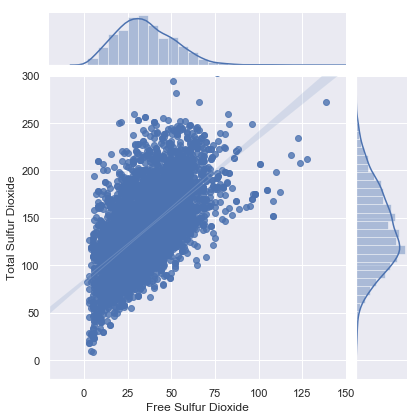

In [40]:
# We have simply added the kind=reg parameter to the jointplot we created earlier.
sns.jointplot(x='Free Sulfur Dioxide', y='Total Sulfur Dioxide', data=wine_data, 
              xlim={-20,150}, ylim={-20,300}, kind="reg")

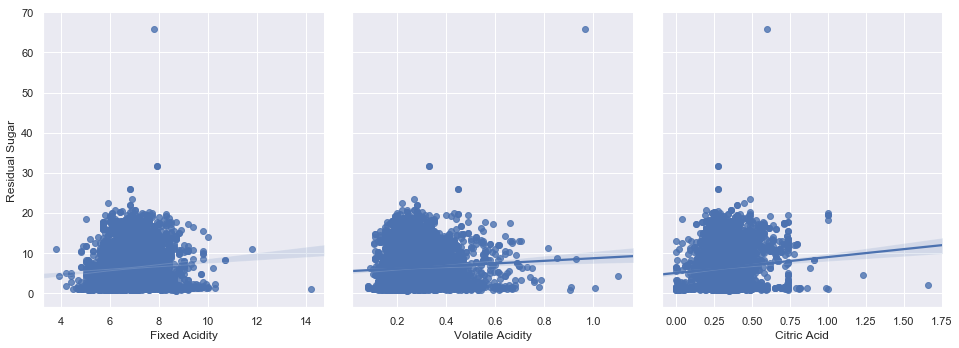

In [41]:
#We have used the pairplot we created earlier but tweaked the x and y variables to get a more compact graph, 
#changed the size and aspect ratio, and added a kind parameter.
sns.pairplot(wine_data, 
             size=5, aspect=0.9, 
             x_vars=["Fixed Acidity","Volatile Acidity","Citric Acid"],
             y_vars=["Residual Sugar"],
             kind="reg")

## Plotting categorical data

In [43]:
#setting style for seaborn for better viewability
sns.set(style="whitegrid", color_codes=True)

#set up for statistical analysis
np.random.seed(sum(map(ord, "categorical")))

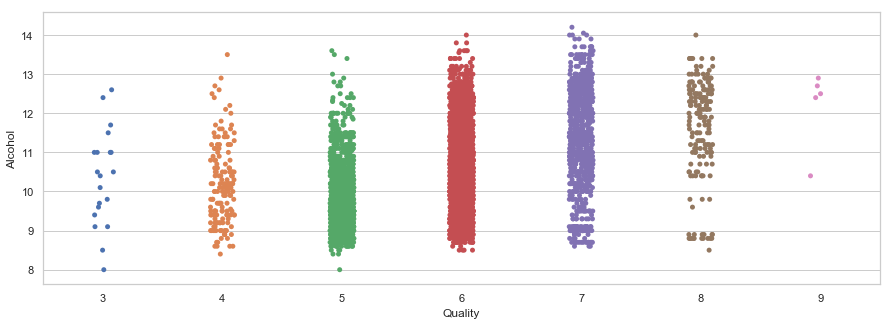

In [44]:
f,ax=plt.subplots(figsize=(15,5))
sns.stripplot(x='Quality', y='Alcohol', data=wine_data)

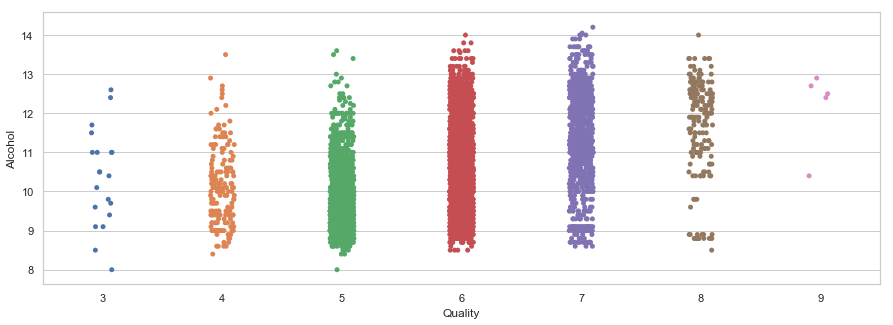

In [45]:
f,ax=plt.subplots(figsize=(15,5))
sns.stripplot(x='Quality', y='Alcohol', data=wine_data, jitter=True)

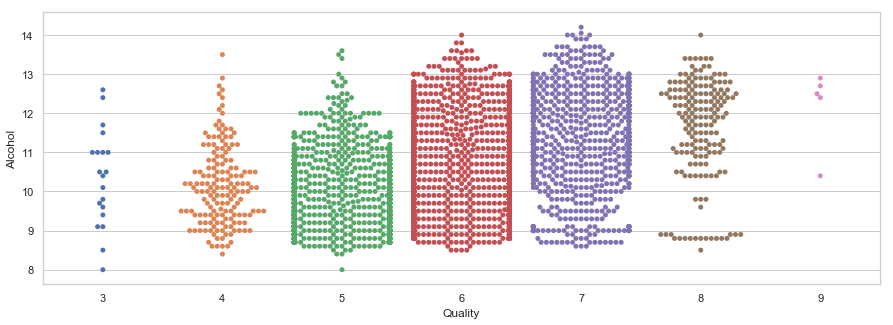

In [46]:
f,ax=plt.subplots(figsize=(15,5))
sns.swarmplot(x='Quality', y='Alcohol', data=wine_data)

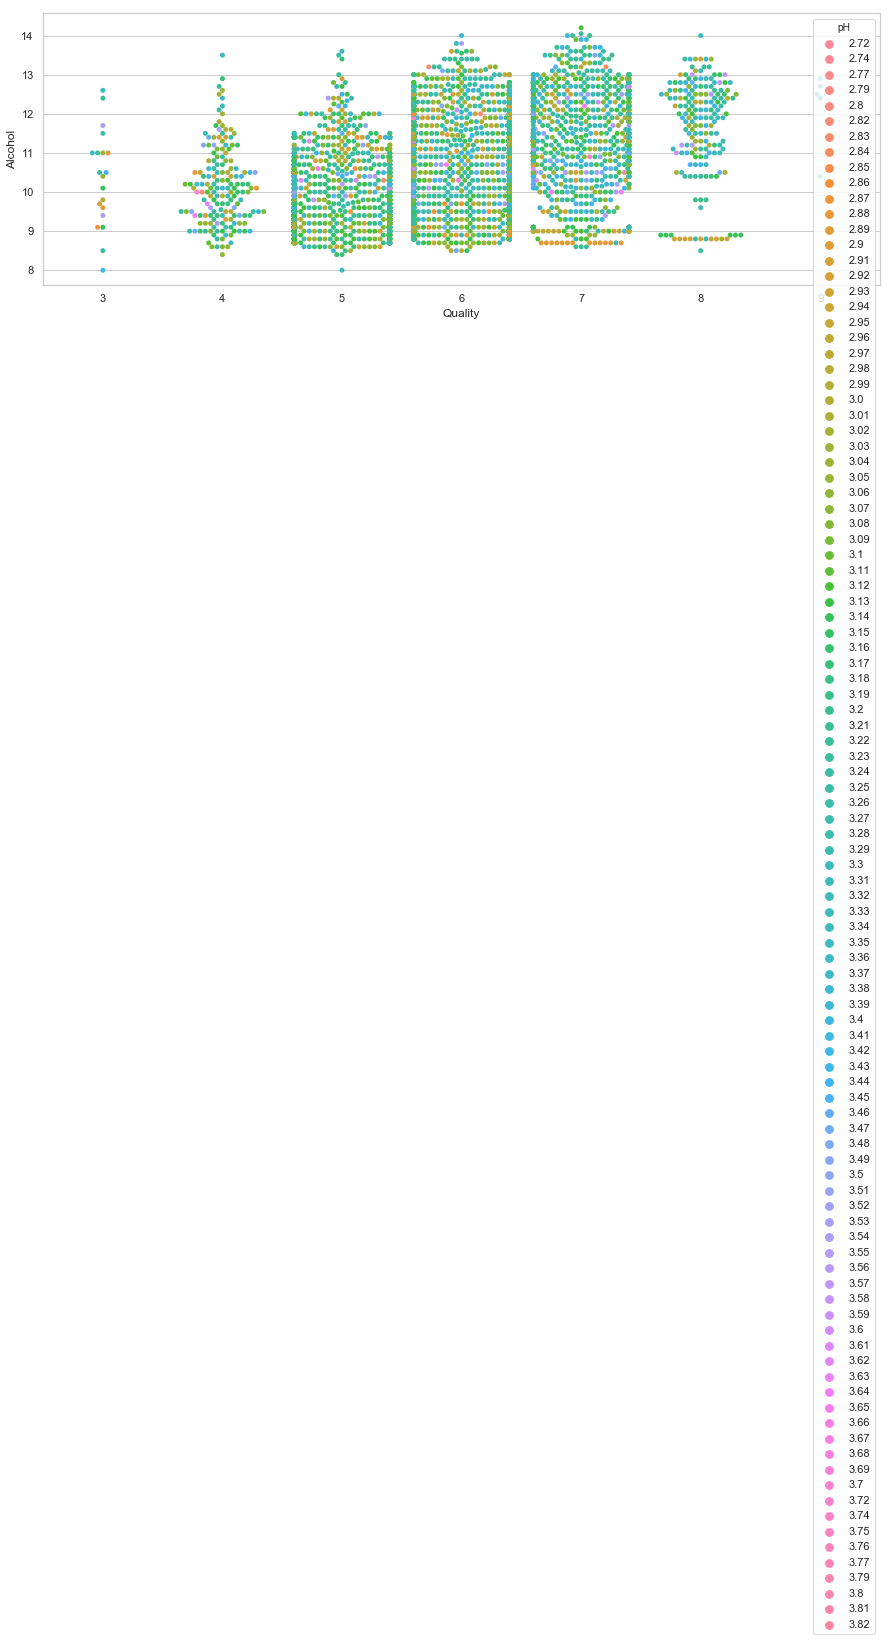

In [47]:
f,ax=plt.subplots(figsize=(15,5))
sns.swarmplot(x='Quality', y='Alcohol', data=wine_data, hue="pH")

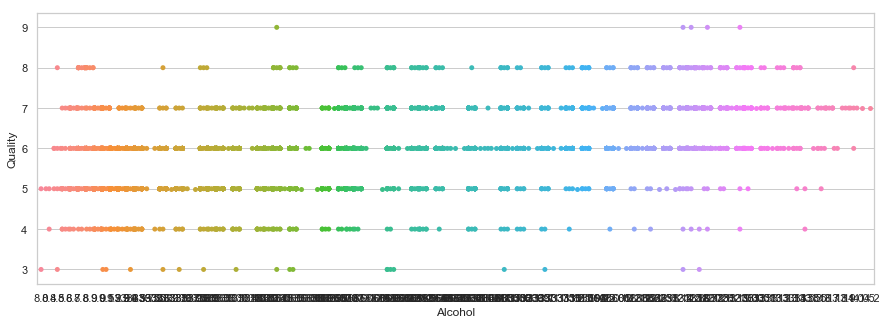

In [48]:
f, ax = plt.subplots(figsize=(15,5))

#The axes have been interchanged
sns.swarmplot(y='Quality', x='Alcohol', data=wine_data)

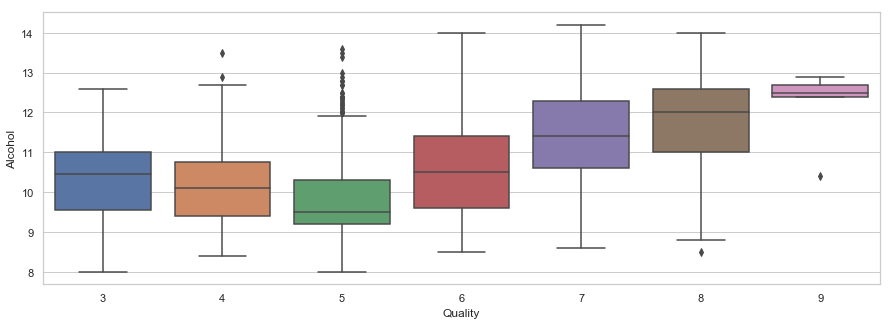

In [49]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(15,5))

sns.boxplot(x='Quality', y='Alcohol', data=wine_data)

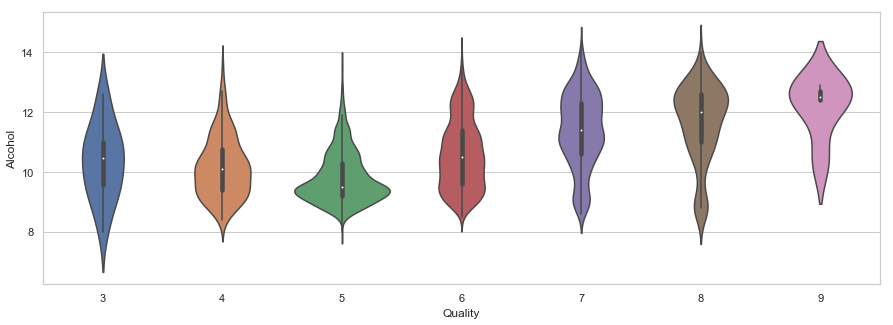

In [50]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(15,5))

sns.violinplot(x='Quality', y='Alcohol', data=wine_data)

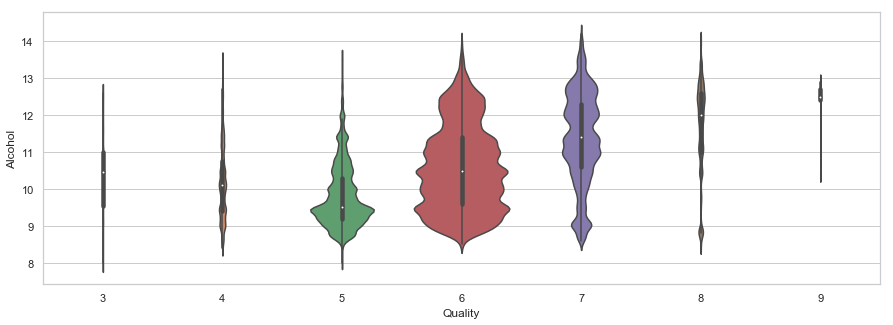

In [51]:
f,ax=plt.subplots(figsize=(15,5))

sns.violinplot(x='Quality', y='Alcohol', data=wine_data,
               bw=.1, scale="count")

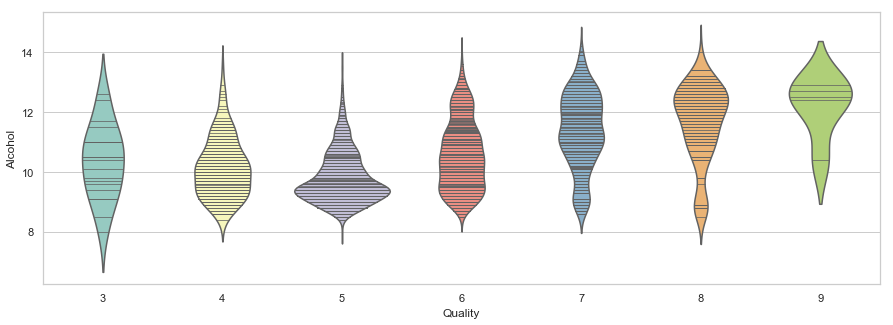

In [52]:
f,ax=plt.subplots(figsize=(15,5))
sns.violinplot(x='Quality', y='Alcohol', data=wine_data, inner="stick", palette="Set3")

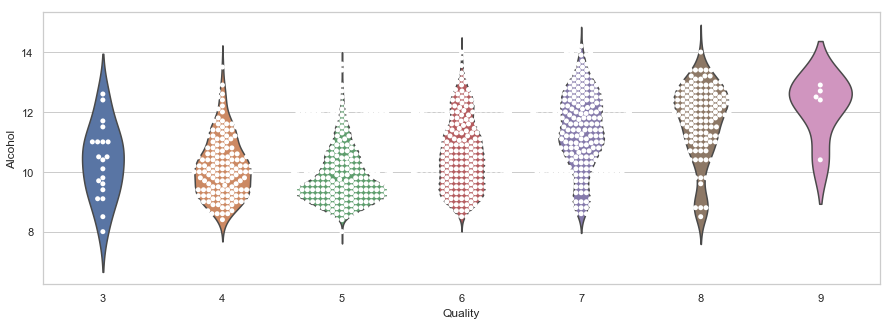

In [53]:
#setting the size for the plot
f,ax=plt.subplots(figsize=(15,5))

#A combination of different plots on the same graph sometimes provides more information than individually 
#analysing different plots.

sns.violinplot(x='Quality', y='Alcohol', data=wine_data, inner=None)
sns.swarmplot(x='Quality', y='Alcohol', data=wine_data, color='w')

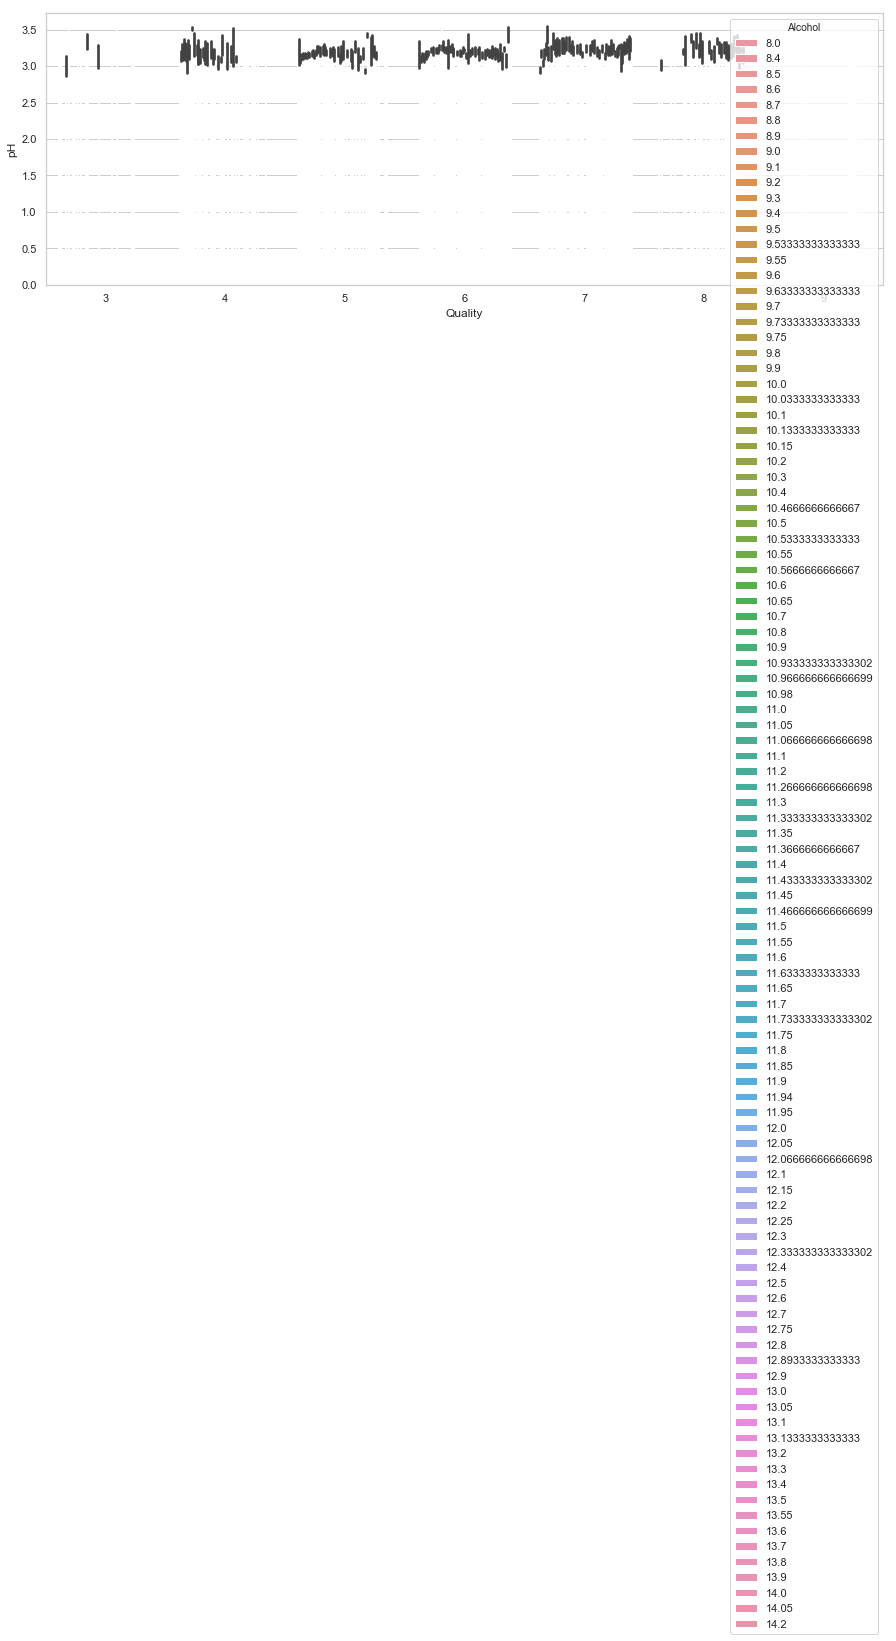

In [54]:
f,ax=plt.subplots(figsize=(15,5))
sns.barplot(x='Quality', y='pH', data=wine_data, hue="Alcohol")

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102]),
 <a list of 103 Text xticklabel objects>)

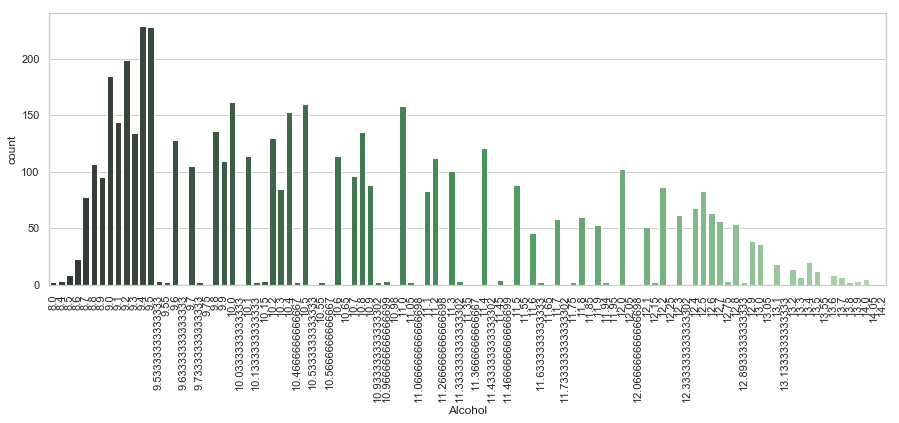

In [55]:
f,ax=plt.subplots(figsize=(15,5))
sns.countplot(x='Alcohol', data=wine_data, palette="Greens_d")
plt.xticks(rotation=90) 

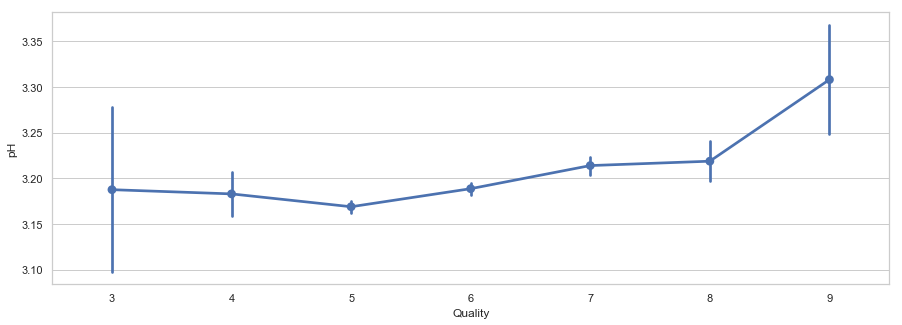

In [56]:
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Quality', y='pH', data=wine_data)

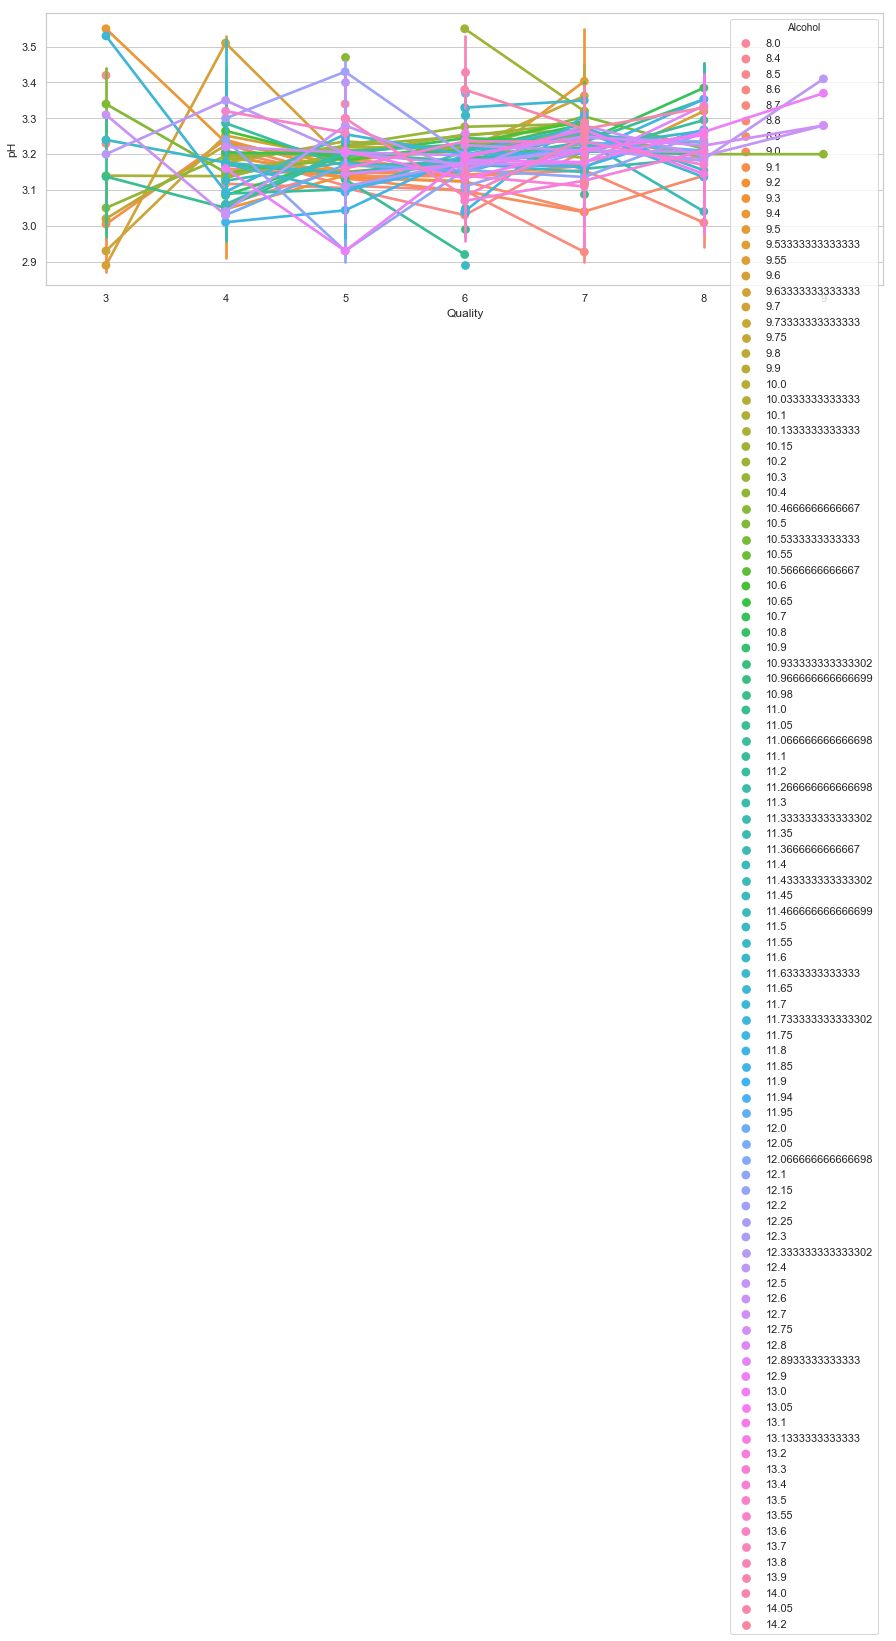

In [57]:
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Quality', y='pH', data=wine_data, hue="Alcohol")

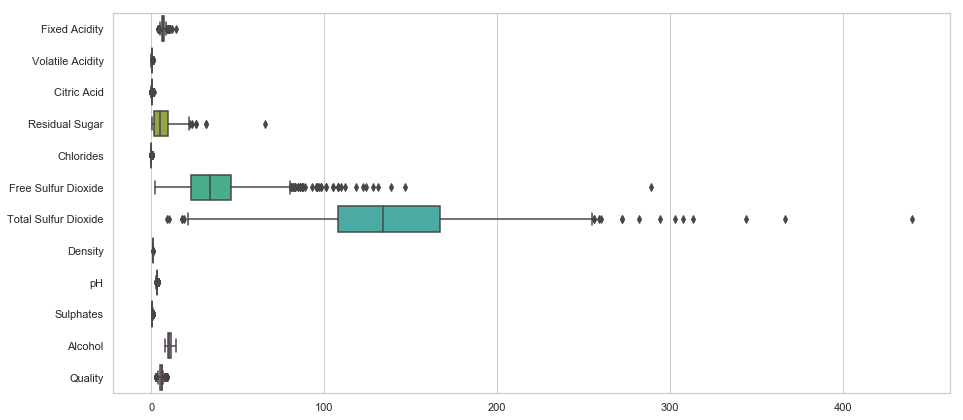

In [58]:
f,ax=plt.subplots(figsize=(15,7))
sns.boxplot(data=wine_data, orient="h")

c:\users\andre\scoop\apps\python\3.7.2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\andre\scoop\apps\python\3.7.2\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


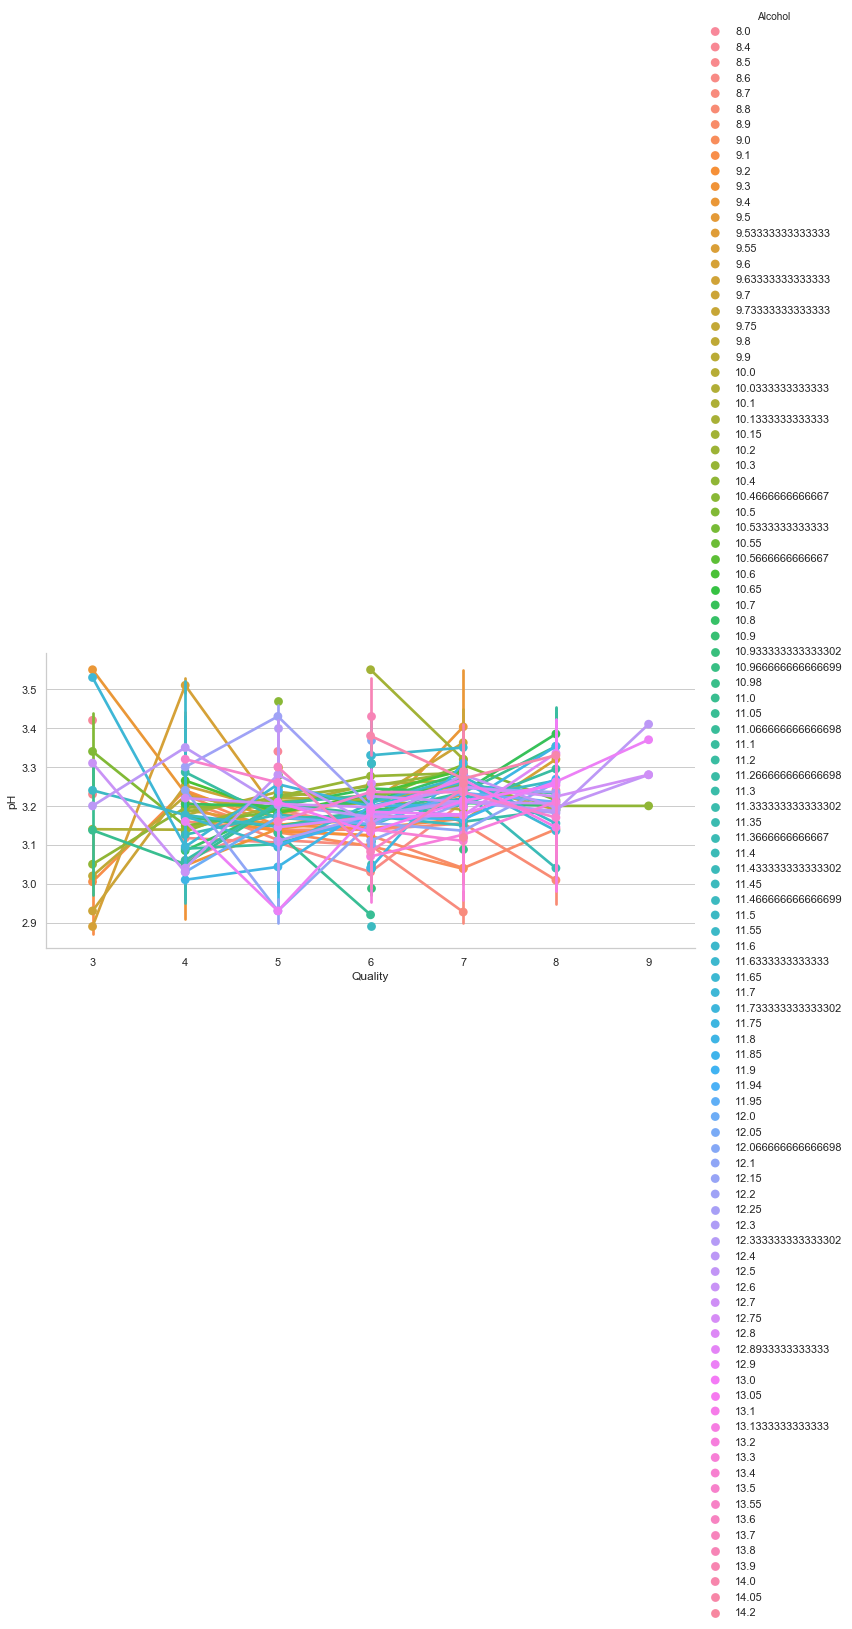

In [59]:
sns.factorplot(x='Quality', y='pH', data=wine_data, hue="Alcohol", size=5, aspect=2)

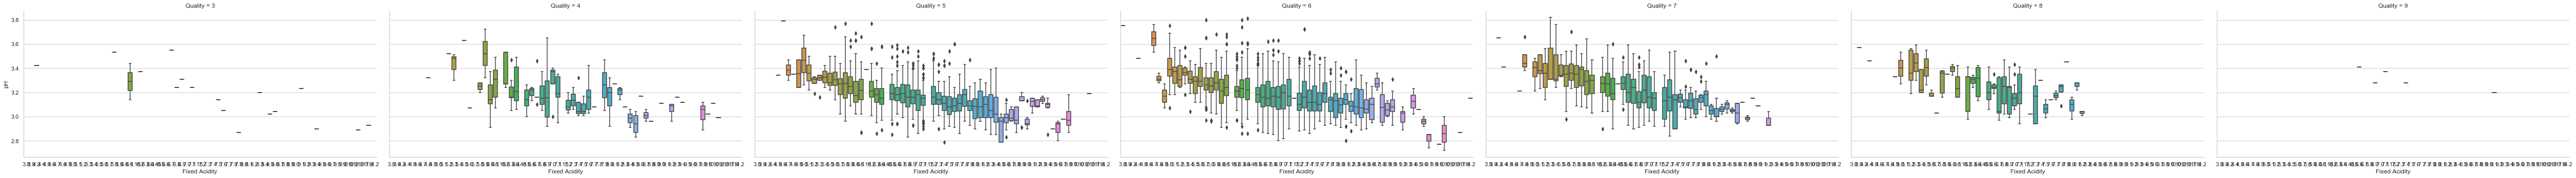

In [60]:
sns.factorplot(x='Fixed Acidity', y='pH', data=wine_data, size=5, aspect=2,
               col="Quality",kind="box")

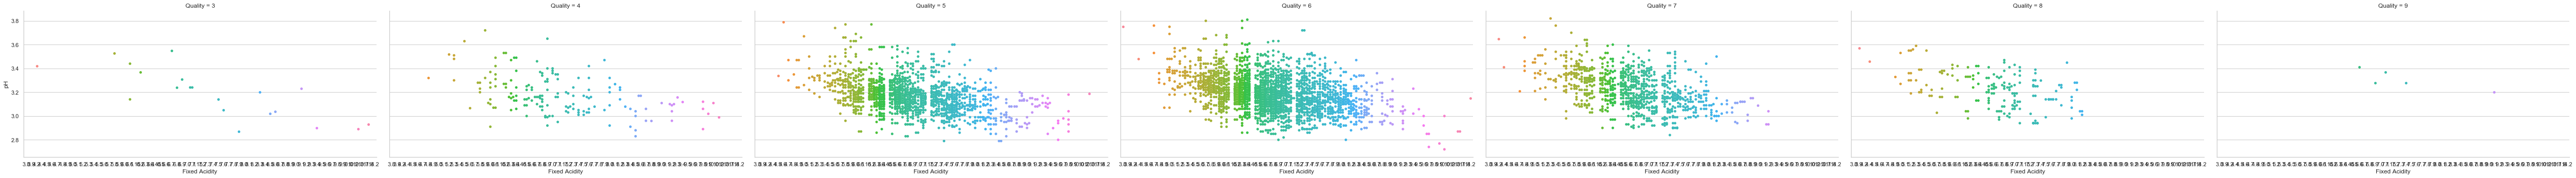

In [61]:
sns.factorplot(x='Fixed Acidity', y='pH', data=wine_data, size=5, aspect=2,
               col="Quality",kind="swarm")